In [4]:
import pandas as pd
%matplotlib inline
from collections import Counter
# source: https://www.kaggle.com/datasnaek/youtube-new/data

In [5]:
trending = pd.DataFrame.from_csv('USvideos.csv')
categories = pd.DataFrame.from_csv("categories.csv",index_col=None)
trending=trending.merge(categories,on="category_id")

In [3]:
trending

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs
5,17.14.11,Mark Ruffalo Reads Hilarious Thirst Tweets,BuzzFeed Celeb,22,2017-11-11T00:30:16.000Z,"BuzzFeed|""buzzfeed celeb""|""Mark Ruffalo""|""Thor...",177707,6271,88,275,https://i.ytimg.com/vi/pa_oUisZZy0/default.jpg,False,False,False,I'm just...I'm flattered.\n\nCredits: https://...,People & Blogs
6,17.14.11,Idiot's Guide to Japanese Squat Toilets,Rachel and Jun,22,2017-11-09T11:24:14.000Z,"Japan|""Japanese""|""yt:cc=on""|""idiot's""|""guide""|...",1098897,43875,1326,4702,https://i.ytimg.com/vi/fCTKDn3Q8xQ/default.jpg,False,False,False,Our jewelry collection! https://motif.me/rache...,People & Blogs
7,17.14.11,"Russian Bots and Trolls | November 8, 2017 Act...",Full Frontal with Samantha Bee,22,2017-11-09T07:00:01.000Z,"Full Frontal with Samantha Bee|""Full Frontal""|...",362009,5505,2356,1264,https://i.ytimg.com/vi/_dhneCO4YEE/default.jpg,False,False,False,"For the low, low price of $200, you too can co...",People & Blogs
8,17.14.11,The Ultimate Red Lip Look | Nicole Guerriero,Nicole Guerriero,22,2017-11-10T00:24:29.000Z,"nicole guerriero|""arriba liqud lipstick""|""colo...",294387,15247,385,976,https://i.ytimg.com/vi/EYkEshCOhEU/default.jpg,False,False,False,To see the power of this lip watch my One Chip...,People & Blogs
9,17.14.11,Could Anastasia Become A Disney Princess?,SuperCarlinBrothers,22,2017-11-09T23:27:18.000Z,"SuperCarlinBrothers|""disney""|""fox""|""disney pri...",188003,9091,135,2814,https://i.ytimg.com/vi/Eg_kW5fw6qU/default.jpg,False,False,False,"Special Thanks to these Patreons :: Abi Solk, ...",People & Blogs


### Correlaties

In [4]:
trending.corr()[(trending.corr() > 0.5) | (trending.corr() < -0.5)]

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views,NaN,1.000000,0.801844,0.524888,0.579753,NaN,NaN,NaN
likes,NaN,0.801844,1.000000,NaN,0.721627,NaN,NaN,NaN
dislikes,NaN,0.524888,NaN,1.000000,0.824850,NaN,NaN,NaN
comment_count,NaN,0.579753,0.721627,0.824850,1.000000,NaN,NaN,NaN
comments_disabled,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
ratings_disabled,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
video_error_or_removed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### Hoe staan likes in verband met views? Waarom krijgen bepaalde trending videos percentueel gezien meer likes?

In [6]:
# Voeg ratios toe
trending['like_view_ratio'] = trending.likes / trending.views
trending['dislike_view_ratio'] = trending.dislikes / trending.views

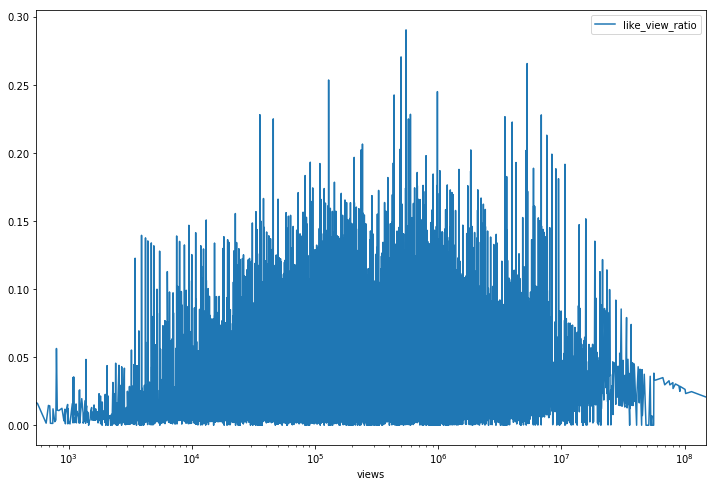

In [6]:
# Voeg ratios toe
trending['like_view_ratio'] = trending.likes / trending.views
# Ratio likes ten opzichte van views.
trending.sort_values(by='views').plot(x='views', y="like_view_ratio", figsize=(12,8), logx=True)

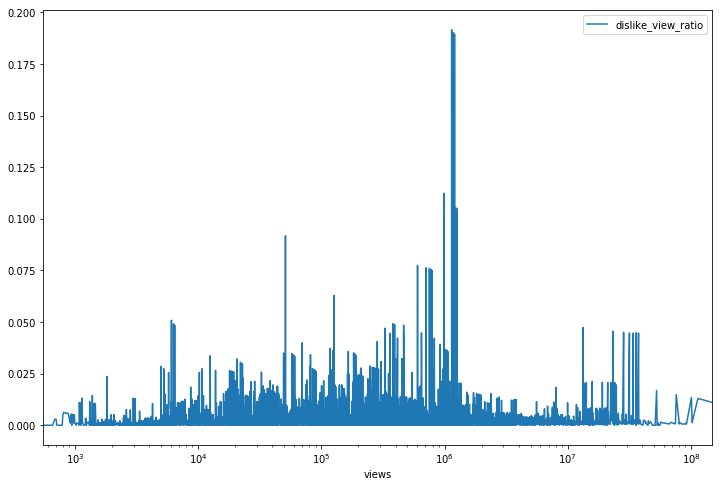

In [7]:
# Ratio dislikes ten opzichte van views.
trending.sort_values(by='views').plot(x='views', y="dislike_view_ratio", figsize=(12,8), logx=True)

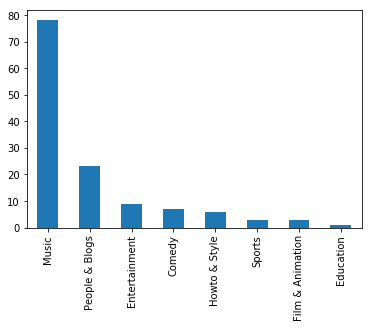

In [28]:
# Welke categorieën zijn sterk vertegenwoordigd bij de hoge ratio?
import matplotlib.pyplot as plt
trending[trending.like_view_ratio > 0.15].category_name.value_counts().plot(kind='bar')



### Meest controversiele videos in trending? Hebben deze dan ook meer comments dan niet controversiele videos? Wat zijn de onderwerpen van deze videos?

In [9]:
trending["like_dislike_ratio"] = trending.likes / trending.dislikes
trending[trending.like_dislike_ratio < 1].sort_values(by="like_dislike_ratio", ascending=True)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_view_ratio,dislike_view_ratio,like_dislike_ratio
14075,17.22.11,Kelly Oubre Punches John Wall in the Lead duri...,Rob Andretti,17,2017-10-28T11:15:14.000Z,[none],2447,0,3,1,https://i.ytimg.com/vi/A_mlvG_nRsg/default.jpg,False,False,False,I'm BACK! \n\n• Will you be apart of the take ...,Sports,0.000000,0.001226,0.000000
14062,17.21.11,Kelly Oubre Punches John Wall in the Lead duri...,Rob Andretti,17,2017-10-28T11:15:14.000Z,[none],2197,0,2,0,https://i.ytimg.com/vi/A_mlvG_nRsg/default.jpg,False,False,False,I'm BACK! \n\n• Will you be apart of the take ...,Sports,0.000000,0.000910,0.000000
581,17.19.12,PSA from Chairman of the FCC Ajit Pai,Daily Caller,22,2017-12-13T22:52:57.000Z,"thedc|""dc""|""washington dc""|""washington""|""the d...",1142585,9100,218841,28013,https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg,False,False,False,Ajit Pai has been at the heart of the net neut...,People & Blogs,0.007964,0.191531,0.041583
603,17.20.12,PSA from Chairman of the FCC Ajit Pai,Daily Caller,22,2017-12-13T22:52:57.000Z,"thedc|""dc""|""washington dc""|""washington""|""the d...",1179072,9368,224152,29063,https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg,False,False,False,Ajit Pai has been at the heart of the net neut...,People & Blogs,0.007945,0.190109,0.041793
620,17.21.12,PSA from Chairman of the FCC Ajit Pai,Daily Caller,22,2017-12-13T22:52:57.000Z,"thedc|""dc""|""washington dc""|""washington""|""the d...",1205682,9572,228426,29634,https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg,False,False,False,Ajit Pai has been at the heart of the net neut...,People & Blogs,0.007939,0.189458,0.041904
12514,17.15.12,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14T18:49:06.000Z,"fcc net neutrality|""breaking news video""|""vide...",985179,4870,110707,19843,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,News & Politics,0.004943,0.112372,0.043990
12570,17.18.12,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14T18:49:06.000Z,"fcc net neutrality|""breaking news video""|""vide...",1263104,5930,132439,23543,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,News & Politics,0.004695,0.104852,0.044775
12551,17.17.12,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14T18:49:06.000Z,"fcc net neutrality|""breaking news video""|""vide...",1242998,5884,130836,23297,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,News & Politics,0.004734,0.105258,0.044972
12533,17.16.12,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14T18:49:06.000Z,"fcc net neutrality|""breaking news video""|""vide...",1192501,5707,126649,23426,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,News & Politics,0.004786,0.106205,0.045062
1224,18.31.01,LuLaRoe Consultant Mocks Those With Special Needs,J S,22,2018-01-25T02:35:03.000Z,LuLaRoe Budenberger MLMs,212858,27,591,209,https://i.ytimg.com/vi/DQDj074iEuM/default.jpg,False,False,False,Apologyvideo found here: https://www.youtube.c...,People & Blogs,0.000127,0.002776,0.045685


In [197]:
contro = trending[trending.like_dislike_ratio < 1].title.values
for x in contro:
    for y in x.split():
        y.lower()

Counter([y.lower() for x in contro for y in x.split()])

Counter({'#1': 10,
         '#3': 1,
         '#littleones': 1,
         '#metoo': 16,
         '&': 17,
         "'fake'": 2,
         "'i": 7,
         "'monkey'": 3,
         "'n": 2,
         "'sh*thole": 1,
         "'transparent'": 5,
         '(c-span)': 14,
         '(d-ca)': 7,
         '(exclusive)': 9,
         '(full)': 6,
         '(official': 4,
         '*emotional*': 3,
         '-': 15,
         '/': 7,
         '02,': 1,
         '1': 7,
         '1-22-18': 5,
         '1/25/18': 5,
         '10': 5,
         '11,': 1,
         '11:': 6,
         '13,': 2,
         '17,': 7,
         '2017': 9,
         '2018': 45,
         '2018:': 10,
         '2020': 6,
         '23,': 2,
         '3,': 3,
         '33': 4,
         '5': 9,
         '7th': 7,
         'a': 27,
         'about': 20,
         'access': 6,
         'account': 2,
         'accused': 7,
         'accusers': 2,
         'accuses': 6,
         'act': 7,
         'ad': 1,
         'addresses': 13,
        

In [29]:
# VANAF HIER
from wordcloud import wordcloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import random
import re


ModuleNotFoundError: No module named 'wordcloud'

In [299]:
def color_func_red(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 50%%, %d%%)" % random.randint(40, 80)

def color_func_green(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(100, 50%%, %d%%)" % random.randint(40, 80)

def color_func_blue(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(200, 50%%, %d%%)" % random.randint(40, 80)

In [318]:
def gen_word_cloud(data, color, collo):
    
    # Kleuren bepalen
    if color == 1:
        func = color_func_red
    elif color == 2:
        func = color_func_green
    else:
        func = color_func_blue
    
    text = " ".join([re.sub(r"[!.\(\)\[\],\´\';\'\-:\'\"]", "", str(x).lower()) for x in data])

    wordcloud = WordCloud(width=2000, height=1000, relative_scaling = 1, max_words=40, collocations=collo, regexp=r"\w[\S']+",
                          stopwords = stopwords.words('english') # set or space-separated string
                          ).generate(text)
    plt.figure( figsize=(20,10) )
    plt.imshow(wordcloud.recolor(color_func=func, random_state=3),
               interpolation="bilinear")
    plt.axis("off")
    plt.show()     

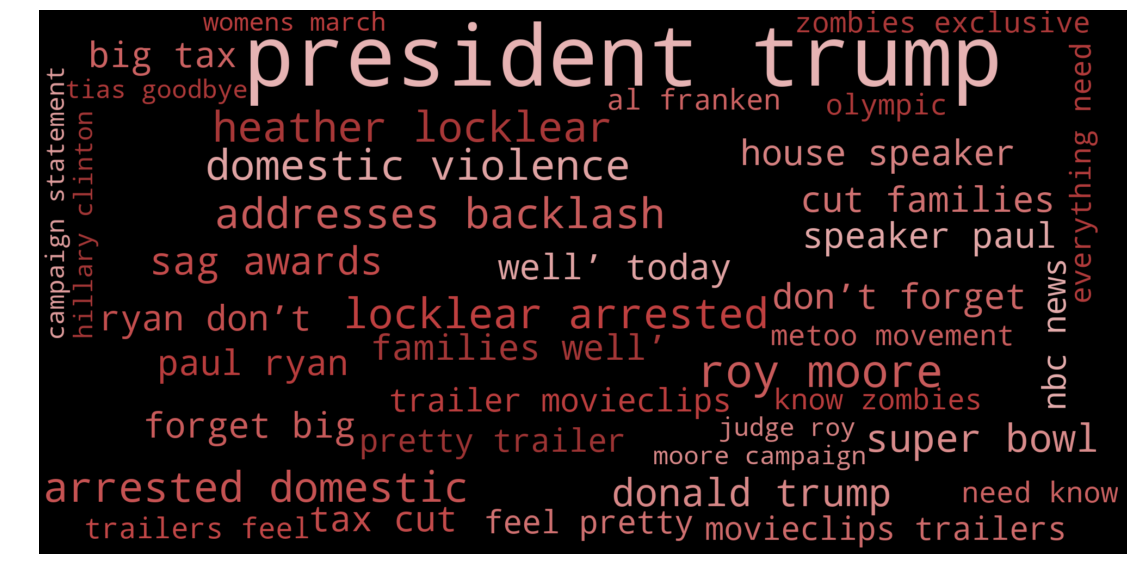

In [319]:
# alles biagrams met negatieve ratio in titels
gen_word_cloud(contro, 1, True)

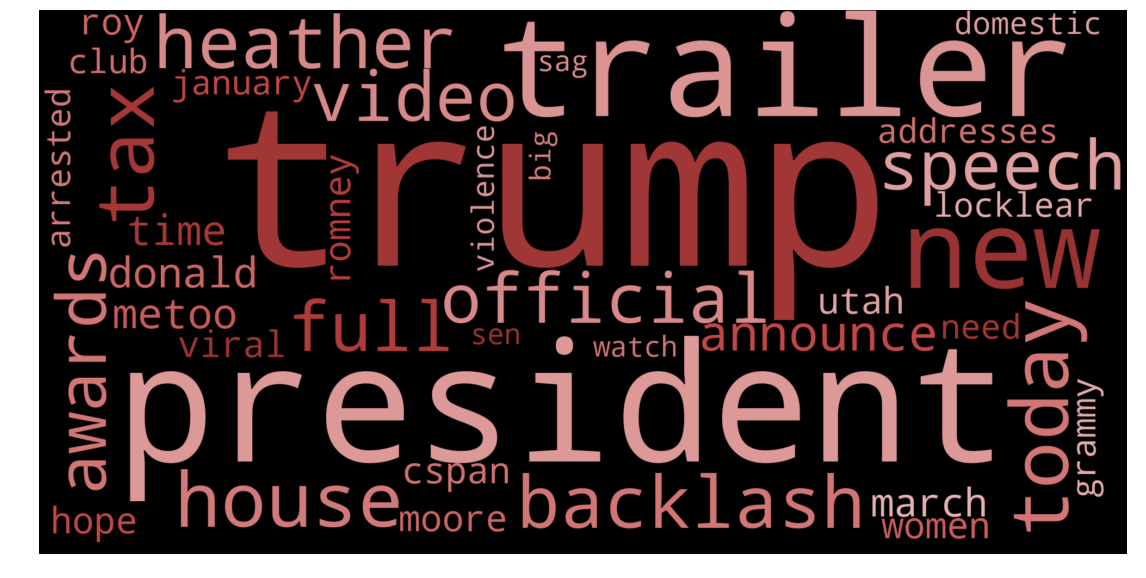

In [306]:
# alles woorden met negatieve ratio in titels
gen_word_cloud(contro, 1, False)

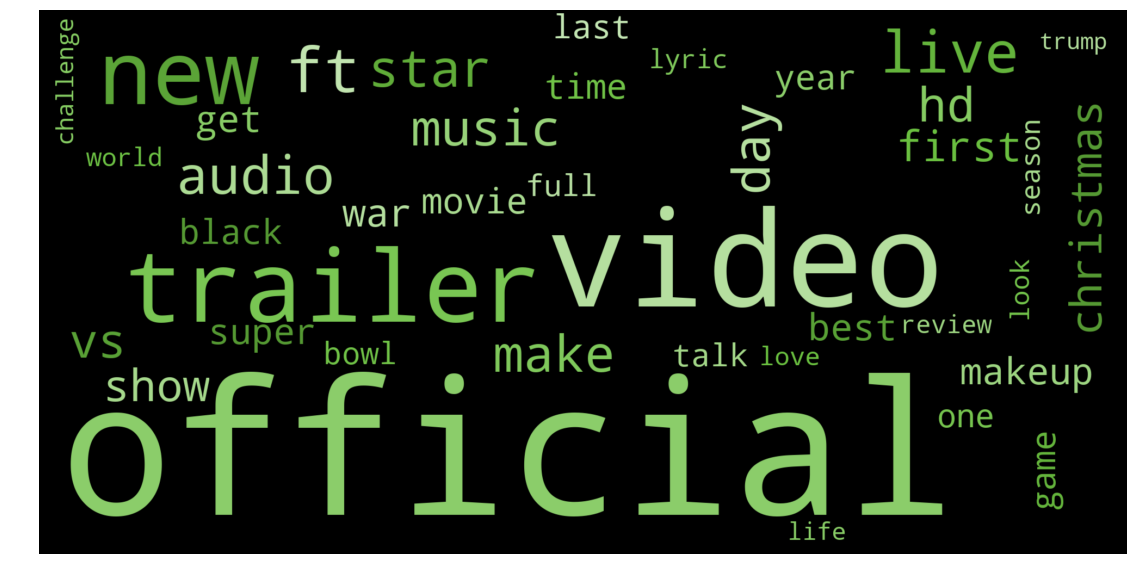

In [307]:
# Alle enkele woorden
titles = trending[trending.like_dislike_ratio > 1].title.values
gen_word_cloud(titles, 2, False)

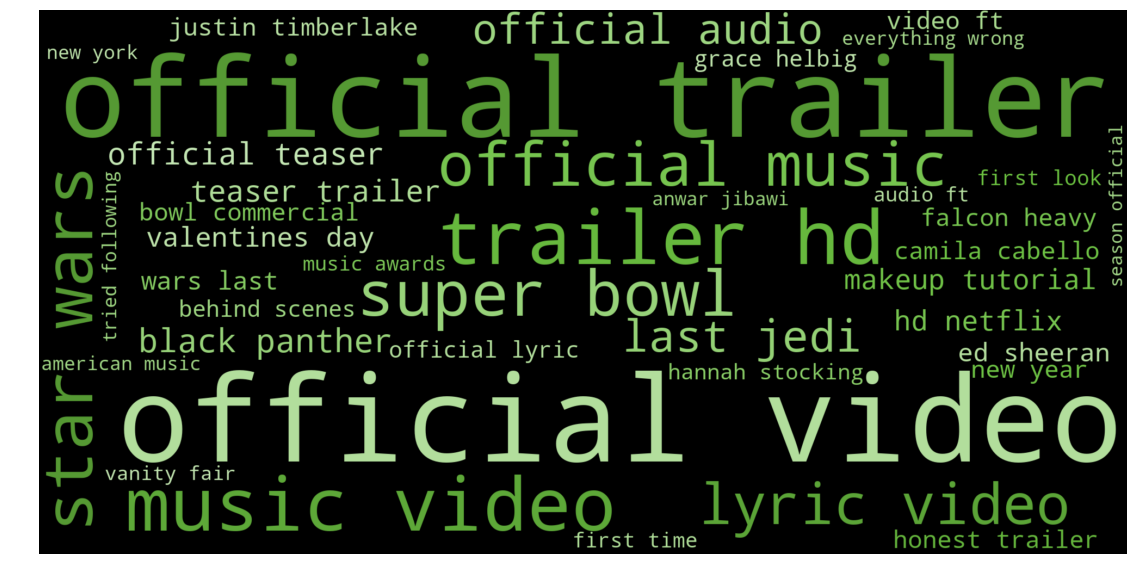

In [308]:
# Alle biagrams met hoge ratio
gen_word_cloud(titles, 2, True)

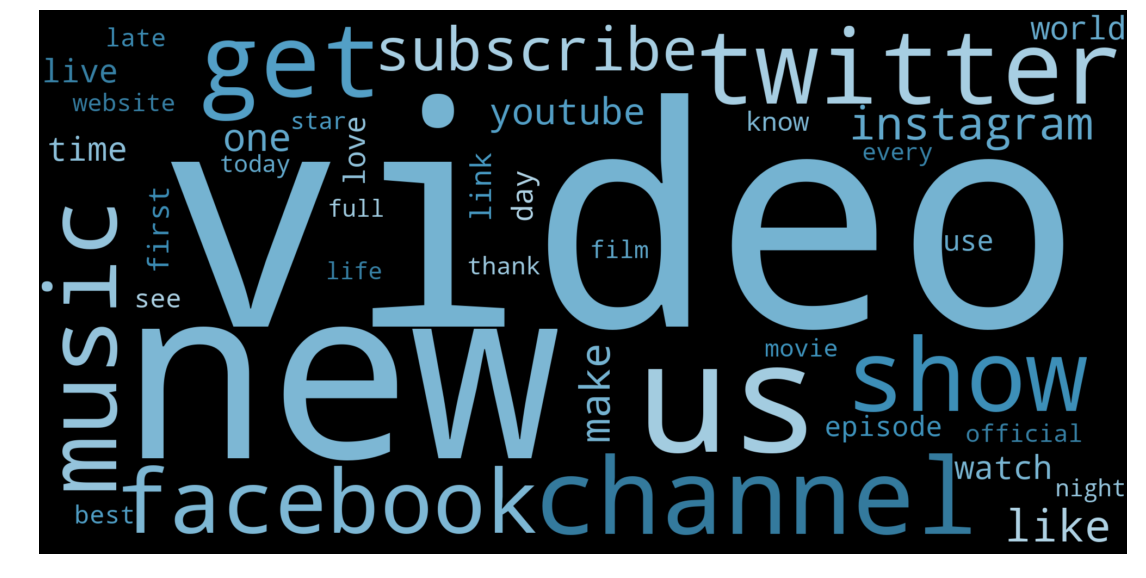

In [301]:
# Alle beschrijvingen bekijken, enkele woorden.
description = trending.description.values
gen_word_cloud(description, 3, False)

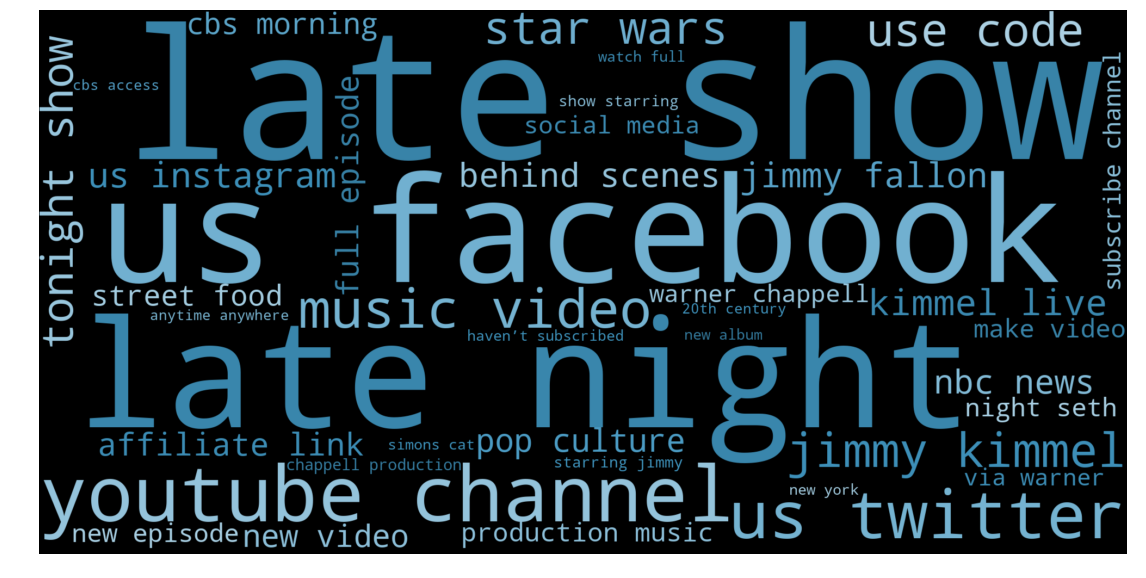

In [304]:
# Biagrams van beschrijvingen
gen_word_cloud(description, 3, True)

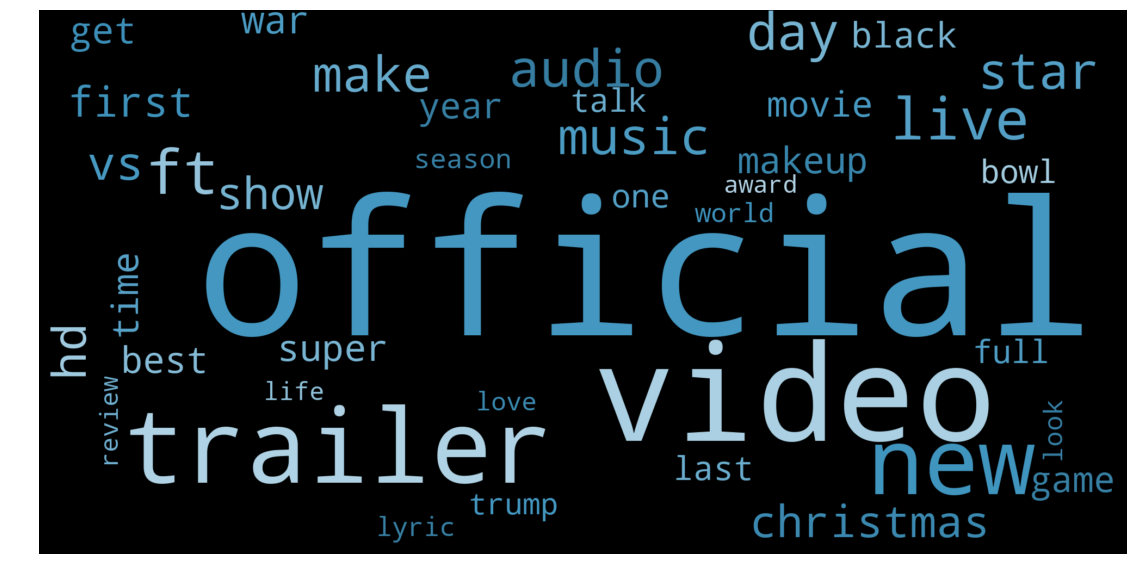

In [303]:
gen_word_cloud(trending.title.values, 3, False)

In [283]:
a = trending.description[277]
print(a)
print("")
print(re.sub(r"[!.,\´\';\'\-:\'\"]", "", a))

YES! I got to hangout with the incredible KARLIE KLOSS and teach her the basics of Braille!! If you enjoyed it, hit the thumbs up and subscribe to my channel. And don't forget to head over to Karlie's channel: https://www.youtube.com/channel/UCH5Qu8Sd-m-7Zk4xc_J5VzA\n\nFollow Me: \nInstagram: @mollyburkeofficial\nFacebook: http://facebook.com/mollyburkeofficial\nTwitter: @mollybofficial \n\nLEARN MORE: http://mollyburkeofficial.com

YES I got to hangout with the incredible KARLIE KLOSS and teach her the basics of Braille If you enjoyed it hit the thumbs up and subscribe to my channel And dont forget to head over to Karlies channel https//wwwyoutubecom/channel/UCH5Qu8Sdm7Zk4xc_J5VzA\n\nFollow Me \nInstagram @mollyburkeofficial\nFacebook http//facebookcom/mollyburkeofficial\nTwitter @mollybofficial \n\nLEARN MORE http//mollyburkeofficialcom


In [ ]:
" ".join([x.lower for x in data])

### Zijn er dagen met uitzonderlijk veel dislikes

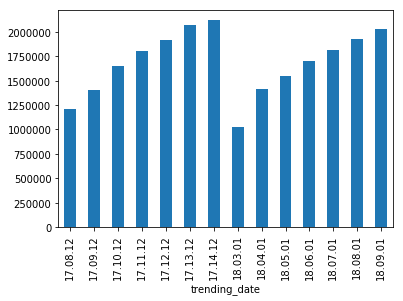

In [11]:
dislikesDay = trending.groupby("trending_date").dislikes.sum()
dislikesDay[dislikesDay>dislikesDay.std()+dislikesDay.mean()].plot(kind="bar")

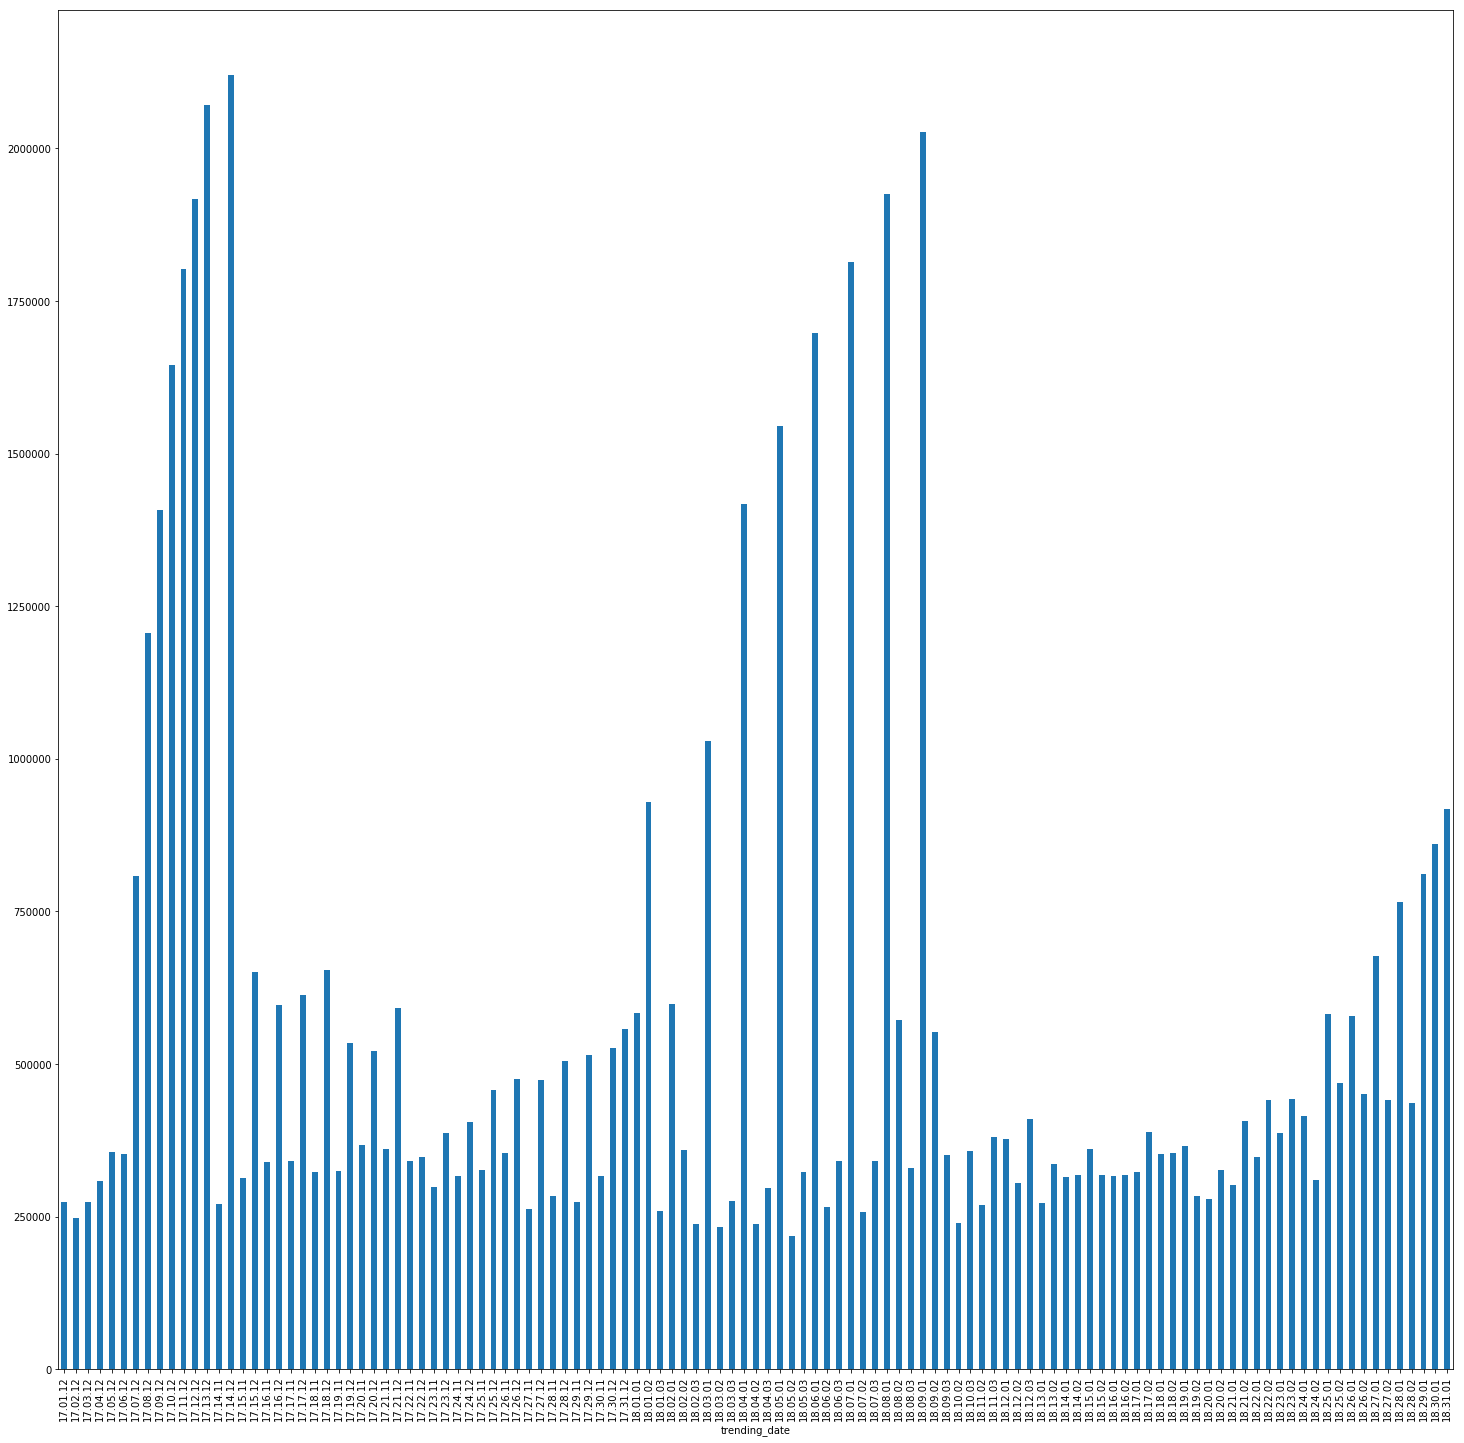

In [12]:
dislikesDay.plot(kind="bar",figsize=(25,25))

### Welke videos zijn in deze periode het meest controversieel (dislikes en likes dicht bij elkaar)

In [13]:
trending[trending.like_dislike_ratio < 1].sort_values(by="like_dislike_ratio", ascending=False).title


12842                       President Trump Signs Tax Bill
12829                       President Trump Signs Tax Bill
12587    Trump delivers remarks regarding his national ...
12818                       President Trump Signs Tax Bill
21146           Cooking With Your Mouth | Christmas Turkey
1974     President Bill Clinton On Dictators, Democracy...
12805                       President Trump Signs Tax Bill
12790                       President Trump Signs Tax Bill
15244    Matthew Santoro - FACTS (Official Music Video)...
12774                       President Trump Signs Tax Bill
9291           Selling My iPhone X To a Machine at Walmart
12756                       President Trump Signs Tax Bill
13141               Eagles players mock Vikings in blowout
4709     Golden Globes 2018: What to Expect as Celebs H...
21119           Cooking With Your Mouth | Christmas Turkey
14483          Top 10 Plays of the Night | January 3, 2018
15194    Matthew Santoro - FACTS (Official Music Video).

### Zijn vrolijke dagen terug te vinden in het aantal likes? Misschien volksfeesten?

In [14]:
# source official US holidays https://www.beleven.org/feesten/lijsten/landen.php?land=Verenigde+Staten in the period
happy_days=["17.23.11","17.25.12","18.1.1","18.15.1"]
holidayTrends=trending[trending.trending_date.isin(happy_days)]

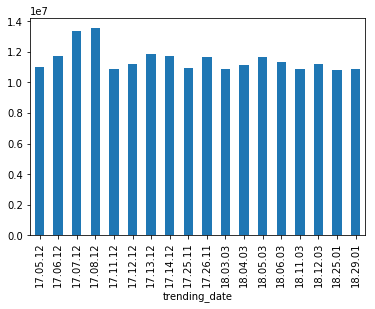

In [15]:
# more likes than usual
likesDay = trending.groupby("trending_date").likes.sum()
likesDay[likesDay>likesDay.std()+likesDay.mean()].plot(kind="bar")

In [16]:
# Find holiday dates in unusual liked days
likesDay[likesDay.index.isin(happy_days)]

trending_date
17.23.11    9357437
17.25.12    8512395
Name: likes, dtype: int64

### Zijn er meer views tijdens vrolijke dagen dan in normale dagen?

In [17]:
# if sum(video_views)/amount_of_videos > video_view.mean() then Yes
holidayTrends.views.sum()/holidayTrends.views.count()>trending.views.mean()

False

### Is er een publicatietijd die vaak voorkomt (verband tussen publicatietijd en views)

In [18]:
# we moeten tijden indelen in blokken van een uur dus 23:30 gaat in het blok van 00:00 en 04:45 in 05:00
times = [[int(y[0]),int(y[1])] for y in [x.split("T")[1][:-8].split(":") for x in trending.publish_time]]
timecodes = []
for hour, minutes in times:
    if minutes==0:
        timecodes.append(hour)
    else:
        if hour != 23:
            timecodes.append(hour+1)
        else:
            timecodes.append(0)
trending["timecode"]= pd.Series(timecodes,index=trending.index)


In [19]:
trending[["timecode","views"]].corr()


,timecode,views
timecode,1.000000,-0.015924
views,-0.015924,1.000000


### Welke categorieen hebben de hoogste aantal likes?

In [20]:
category = trending.groupby("category_name").likes
category.sum().sort_values(ascending=False)

category_name
Music                    406235061
Entertainment            204584370
Comedy                   109303620
People & Blogs            67959615
Film & Animation          63013178
Howto & Style             58289792
Science & Technology      37816982
Sports                    37460861
Education                 19346008
Nonprofits & Activism     14725195
Gaming                    11256420
Pets & Animals             9740082
News & Politics            7694197
Autos & Vehicles           3396271
Travel & Events            2408707
Shows                        53815
Name: likes, dtype: int64